In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import os
from config import key

csv = pd.read_csv('stations.csv')

ModuleNotFoundError: No module named 'config'

In [4]:
version = 'v1'
package = ['history','stations']

# city = 'Singapore'
# country = 'Canada'
# start_date_daily = '2007-01-01'
# end_date_daily = '2019-01-01'

start_date_month = '2008-01'
end_date_month = '2018-12'

#station it is for Singapore
station_id = '48698'
key= 'R2Yy8grC'
#url structure = https://api.meteostat.net/{VERSION}/{PACKAGE}/{METHOD}?{PARAMETERS}
#https://api.meteostat.net/v1/history/hourly?station=03772&start=2019-05-02&end=2019-05-11&time_zone=Europe/London&time_format=Y-m-d%20H:i&key=XXXXXXXX
#https://api.meteostat.net/v1/history/daily?station=10637&start=2017-01-01&end=2017-12-31&key=XXXXXXXX

# historyparams_daily ={
#     'start':start_date_daily,
#     'end':end_date_daily,
#     'key':key
#     }

historyparams_monthly ={
    'start':start_date_month,
    'end':end_date_month,
    'key':key
    }

#method includes: daily, monthly
# qry_daily_url = f'https://api.meteostat.net/v1/history/daily?station={station_id}'
qry_monthly_url = f'https://api.meteostat.net/v1/history/monthly?station={station_id}'

#get request for history
history_monthly = requests.get(qry_monthly_url,params=historyparams_monthly).json()
#history_daily = requests.get(qry_daily_url,params=historyparams_daily).json()
#history_daily

In [5]:
history_monthly

{'meta': {'source': 'National Oceanic and Atmospheric Administration, Deutscher Wetterdienst'},
 'data': [{'month': '2008-01',
   'temperature_mean': 26.8,
   'temperature_mean_min': 24.3,
   'temperature_mean_max': 30.7,
   'temperature_min': 22.9,
   'temperature_max': 33.5,
   'precipitation': 263,
   'raindays': 15,
   'pressure': 1010.3,
   'sunshine': 190},
  {'month': '2008-02',
   'temperature_mean': 26.7,
   'temperature_mean_min': 24,
   'temperature_mean_max': 30.9,
   'temperature_min': 22.4,
   'temperature_max': 33.4,
   'precipitation': 129,
   'raindays': 5,
   'pressure': 1010.9,
   'sunshine': 158},
  {'month': '2008-03',
   'temperature_mean': 26.5,
   'temperature_mean_min': 24,
   'temperature_mean_max': 30.1,
   'temperature_min': 21.8,
   'temperature_max': 32.7,
   'precipitation': 294,
   'raindays': 14,
   'pressure': 1009.7,
   'sunshine': 132},
  {'month': '2008-04',
   'temperature_mean': 28,
   'temperature_mean_min': 25.1,
   'temperature_mean_max': 31.9,

In [7]:
#THIS IS FOR MONTHLY
date_monthly = history_monthly['data'][0]['month']
temp_mean_monthly = history_monthly['data'][0]['temperature_mean']
temp_mean_min_monthly = history_monthly['data'][0]['temperature_mean_min']
temp_mean_max_monthly = history_monthly['data'][0]['temperature_mean_max']
temp_min_monthly = history_monthly['data'][0]['temperature_min']
temp_max_monthly = history_monthly['data'][0]['temperature_max']
precipitation_monthly = history_monthly['data'][0]['precipitation']
raindays_monthly = history_monthly['data'][0]['raindays']
pressure_monthly = history_monthly['data'][0]['pressure']
sunshine_monthly = history_monthly['data'][0]['sunshine']


In [6]:
date_ls = []
temp_mean_ls = []
temp_mean_min_ls = []
temp_mean_max_ls = []
temp_min_ls = []
temp_max_ls = []
precipitation_ls = []
raindays_ls = []
pressure_ls = []
sunshine_ls = []

for x in range(len(history_monthly["data"])):
    date_ls.append(history_monthly['data'][x]['month'])
    temp_mean_ls.append(history_monthly['data'][x]['temperature_mean'])
    temp_mean_min_ls.append(history_monthly['data'][x]['temperature_mean_max'])
    temp_mean_max_ls.append(history_monthly['data'][x]['temperature_mean_min'])
    temp_min_ls.append(history_monthly['data'][x]['temperature_min'])
    temp_max_ls.append(history_monthly['data'][x]['temperature_max'])
    precipitation_ls.append(history_monthly['data'][x]['precipitation'])
    raindays_ls.append(history_monthly['data'][x]['raindays'])
    pressure_ls.append(history_monthly['data'][x]['pressure'])
    sunshine_ls.append(history_monthly['data'][x]['sunshine'])
    

print(f"{len(date_ls)},{len(temp_mean_ls)},{len(temp_mean_ls)},{len(temp_mean_min_ls)},{len(temp_mean_max_ls)},{len(temp_min_ls)},{len(temp_max_ls)},{len(precipitation_ls)},{len(raindays_ls)},{len(pressure_ls)},{len(sunshine_ls)}")

132,132,132,132,132,132,132,132,132,132,132


In [7]:
temp=[]
means=[]
for i in range(11):
    begin=11*i
    end=11*(i+1)
    temp.append(temp_mean_ls[begin:end])
    print(temp[i])
    means.append(np.mean(temp[i]))
    print(means)


[26.8, 26.7, 26.5, 28, 28.8, 28.2, 27.8, 27.5, 27.7, 27.6, 27.3]
[27.53636363636364]
[26.9, 26.8, 27.3, 27.2, 28.5, 28.7, 29.1, 28.2, 28.3, 28.3, 28.2]
[27.53636363636364, 27.954545454545453]
[27.2, 27.1, 27.5, 28.9, 28.6, 28.6, 29.2, 28.3, 27.7, 27.9, 28]
[27.53636363636364, 27.954545454545453, 28.090909090909086]
[28.3, 27.4, 26.8, 26.3, 27.3, 27, 27.9, 28.5, 28.4, 28.7, 27.9]
[27.53636363636364, 27.954545454545453, 28.090909090909086, 27.681818181818183]
[27.8, 27.3, 27.1, 26.6, 26.7, 27.2, 27, 27.6, 28.2, 28.7, 27.7]
[27.53636363636364, 27.954545454545453, 28.090909090909086, 27.681818181818183, 27.44545454545454]
[28, 27.9, 27.7, 27.1, 26.7, 27, 26.5, 28.3, 28.2, 28.2, 29]
[27.53636363636364, 27.954545454545453, 28.090909090909086, 27.681818181818183, 27.44545454545454, 27.690909090909088]
[27.8, 27.9, 27.5, 27.7, 27.1, 26.5, 26.2, 27.2, 27.9, 28.2, 28.6]
[27.53636363636364, 27.954545454545453, 28.090909090909086, 27.681818181818183, 27.44545454545454, 27.690909090909088, 27.50909

In [8]:
dates= [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

In [9]:
df2 = pd.DataFrame(dates)
df2['tempannual'] = means

df2
# df['tempMeanMin'] = temp_mean_min_ls
# df['tempMeanMax'] =temp_mean_max_ls
# df['tempMin'] =temp_min_ls
# df['tempMax'] = temp_max_ls
# df['precip'] = precipitation_ls
# df['rainDays'] = raindays_ls
# df['pressure'] = pressure_ls
# df['sunshine'] = sunshine_ls
    
# df

,0,tempannual
0,2008,27.536364
1,2009,27.954545
2,2010,28.090909
3,2011,27.681818
4,2012,27.445455
5,2013,27.690909
6,2014,27.509091
7,2015,27.945455
8,2016,28.481818
9,2017,28.127273


In [11]:
print(os.getcwd())
data = pd.read_csv("Singapore.csv") 
df = data.loc[(data["Year"] >= 1970) & (data["Year"] <= 2000)]
df=df.loc[df["T"]!='-',:]
df["T"] = pd.to_numeric(df["T"])
thirtyyearavg= np.mean(df["T"])


C:\Users\ekamj\Documents\GitHub\Project-1\Reference\Singapore


In [12]:
df2["Anomaly"]= df2["tempannual"]-thirtyyearavg


,0,tempannual,Anomaly
0,2008,27.536364,0.344056
1,2009,27.954545,0.762238
2,2010,28.090909,0.898601
3,2011,27.681818,0.489510
4,2012,27.445455,0.253147
5,2013,27.690909,0.498601
6,2014,27.509091,0.316783
7,2015,27.945455,0.753147
8,2016,28.481818,1.289510
9,2017,28.127273,0.934965


In [14]:
df2.columns=["Year","tempannual","anomaly"]
df2

,Year,tempannual,anomaly
0,2008,27.536364,0.344056
1,2009,27.954545,0.762238
2,2010,28.090909,0.898601
3,2011,27.681818,0.489510
4,2012,27.445455,0.253147
5,2013,27.690909,0.498601
6,2014,27.509091,0.316783
7,2015,27.945455,0.753147
8,2016,28.481818,1.289510
9,2017,28.127273,0.934965


Text(0.5, 0, 'Year')

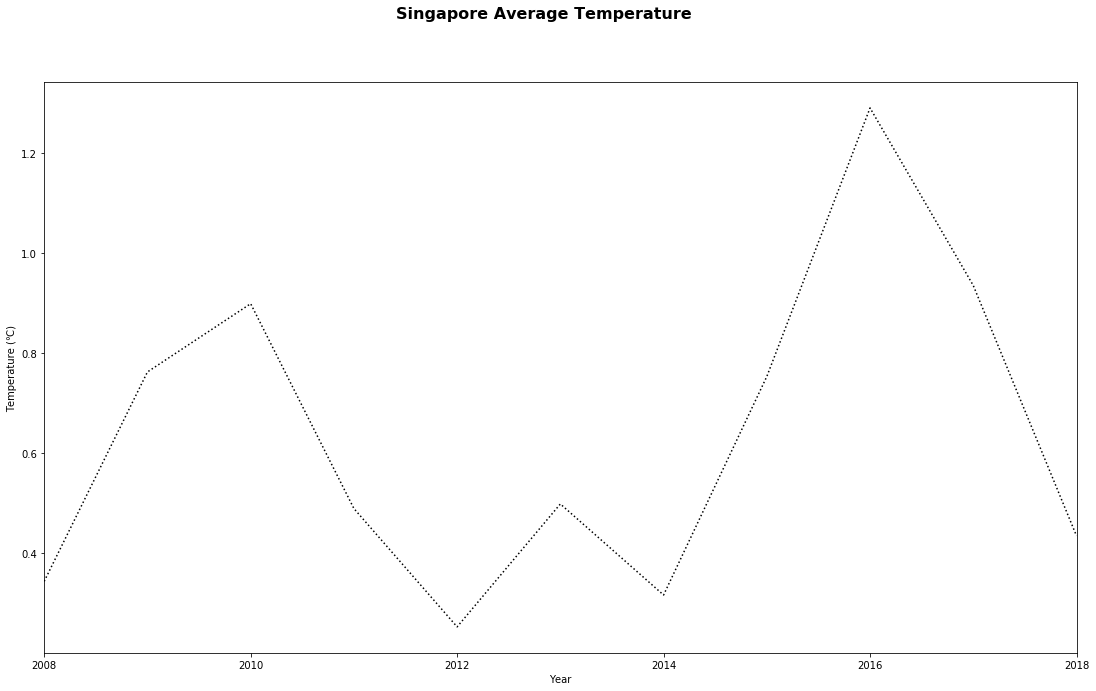

In [17]:
# Plot India mean temperature data

fig, (ax1) = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle("Singapore Tropics Temperature Anomaly (2008-2018)", fontsize=16, fontweight="bold")

ax1.set_xlim(min(df2["Year"]), max(df2["Year"]))
ax1.plot(df2["Year"], df2["anomaly"],color="black", 
         linestyle = ":")

ax1.set_ylabel("Temperature (℃)")
ax1.set_xlabel("Year")

In [19]:
data2 = pd.read_csv("Singapore.csv") 
data2=data2.loc[data2["T"]!='-',:]
data2

,Year,T
1,1955,26.5
2,1956,26.2
3,1957,26.6
4,1958,26.9
5,1959,26.7
6,1960,26.6
7,1961,26.7
8,1962,26.4
9,1963,26.6
10,1964,26.4


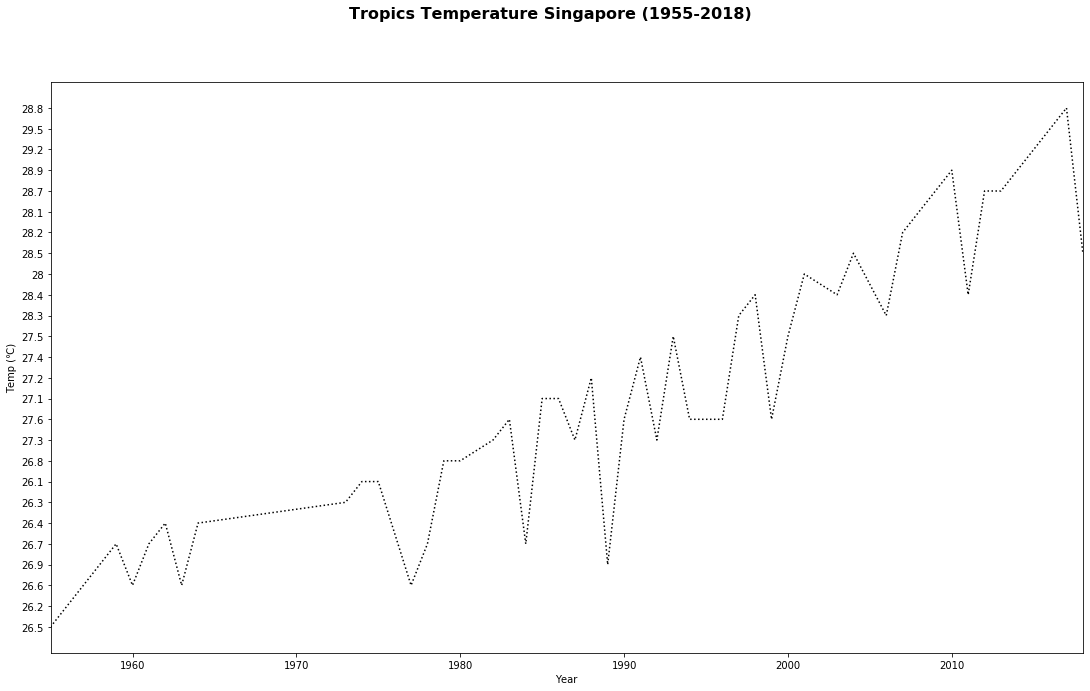

In [20]:
fig, (ax1) = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.suptitle("Tropics Temperature Singapore (1955-2018)", fontsize=16, fontweight="bold")

ax1.set_xlim(min(data2["Year"]), max(data2["Year"]))
ax1.plot(data2["Year"], data2["T"],color="black", 
         linestyle = ":")



ax1.set_ylabel("Temp (℃)")
ax1.set_xlabel("Year")

# Save the plot

plt.savefig("India_Temp_Annomaly.png")

IndexError: positional indexers are out-of-bounds

In [ ]:
data.loc["2018","T"]

In [75]:
datacombined= data.merge(dataplus, on="Year", how = "outer")
datacombined.set_index("Year")
datacombined["T"]

,T_x,T_y
Year,,
1955,26.5,NaN
1956,26.2,NaN
1957,26.6,NaN
1958,26.9,NaN
1959,26.7,NaN
1960,26.6,NaN
1961,26.7,NaN
1962,26.4,NaN
1963,26.6,NaN


In [39]:
dataplus

,Year,T
1,1955,26.5
2,1956,26.2
3,1957,26.6
4,1958,26.9
5,1959,26.7
6,1960,26.6
7,1961,26.7
8,1962,26.4
9,1963,26.6
10,1964,26.4


In [92]:
#rename first column to date
df = df.rename(columns={0:'date'})

In [128]:
df.head()

,date,tempMean,tempMeanMin,tempMeanMax,tempMin,tempMax,precip,rainDays,pressure,sunshine
0,2007-01-01,-1.7,1.4,-4.7,-15.8,11.9,40.0,10.0,1016.9,NaN
1,2007-02-01,-6.9,-3.4,-10.2,-18.5,5.9,26.0,6.0,1015.6,NaN
2,2007-03-01,1.5,5.1,-2.2,-20.9,16.9,44.0,7.0,1021.8,NaN
3,2007-04-01,6.9,10.3,3.6,-6.0,22.8,39.0,9.0,1013.2,NaN
4,2007-05-01,15.1,19.9,10.3,6.0,30.1,53.0,5.0,1020.0,NaN


In [100]:
df['date'] = pd.to_datetime(df['date'])

In [101]:
x_axis = df['date']

In [102]:
type(df['date'])

pandas.core.series.Series

In [103]:
type(x_axis)

pandas.core.series.Series

In [129]:
y_axis_avgTemp = df['tempMean']
y_axis_avgTempMin = df['tempMeanMin']
y_axis_avgTempMax = df['tempMeanMax']
y_axis_tempMin = df['tempMin']
y_axis_tempMax = df['tempMax']
#y_axis_avgTempMax = df['tempMeanMax']
#y_axis_avgTempMax = df['tempMeanMax']


#y_axis_avgTemp = df['tempMean']
#y_axis_avgTemp = df['tempMean']


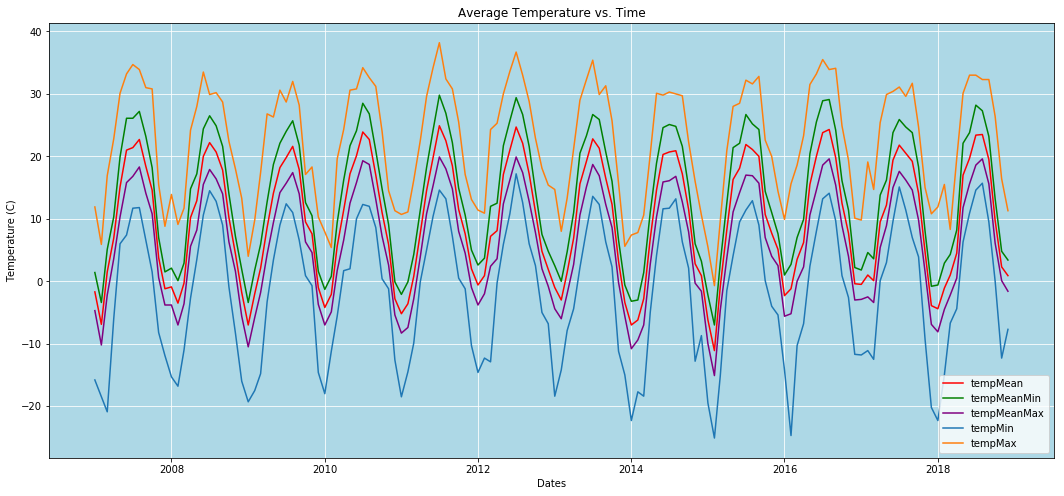

In [137]:
#x_ticks =['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

fig, ax = plt.subplots()


ax.plot(x_axis,y_axis_avgTemp,c='red'm)
ax.plot(x_axis,y_axis_avgTempMin,c='green')
ax.plot(x_axis,y_axis_avgTempMax,c='purple')
ax.plot(x_axis,y_axis_tempMin)
ax.plot(x_axis,y_axis_tempMax)
#ax.plot(x_axis,)
#ax.scatter(x_axis,y_axis,c='red',s=200)
#ax.set_xticks()
#ax.set_xlim('2005','2020')
fig.set_figheight(8)
fig.set_figwidth(18)
ax.set_title('Average Temperature vs. Time')
ax.set_xlabel('Dates')
ax.set_ylabel('Temperature (C)')
ax.set_facecolor('lightblue')
ax.grid(color='white')
ax.legend()


plt.savefig(os.path.join(f'Test.png'))
#plt.show()

In [ ]:
#ROUGH CODE FOLLOWS

In [ ]:
cityparams ={
    'q':city,
    'key':key
    }

qry_url_city = 'https://api.meteostat.net/v1/stations/search?'

countryparams={
    'country':country,
    'key':key   
    }
#response_country = requests.get(qry_url_country).json()
qry_url_country = 'https://api.meteostat.net/v1/stations/search?q=CA'

#response_country = requests.get(qry_url_country).json()
test_url = f'https://api.meteostat.net/v1/stations/search?q={city}&key={key}'

In [ ]:


#for index, row in staging_df.iterrows():
#    stationid = row['station_id']
#    stationidparams={
#    'start':start_date,
#    'end':end_date,
#    'key':key
#    }
#    print(f'Processing Record {index} set of | {stationid}')
#    response = requests.get(qry_history_url,params=stationidparams).json()
    
    #try:
    #    staging_df['meta_source'] = history['meta']['source']
    #except:KeyError
    #    print('missing values, i am going to skip it')
    #    print('====================================')


In [ ]:
csv.head()

In [ ]:
# #station id
# station_df = csv['stationid']

# #reset index for dataframe
# station_df = station_df.reset_index()

# station_df.head()

In [ ]:
#stationid = row['stationid']

#station

stationidparams={
    'start':start_date,
    'end':end_date,
    'key':key
    }
    #print(f'Processing Record {index} set of | {stationid}')
response = requests.get(qry_history_url,params=stationidparams).json()

In [ ]:
stationid = station_df['stationid']

In [ ]:
station_df['stationid']

In [ ]:
#city_df.loc[index,'Cloudiness']=response['clouds']['all']

for index, row in staging_df.iterrows():
    try:
        station_id = row['stationid']
        print(station_id)
    except:
        print('Type error, i am going to skip it')
        print('==================================')
    #qry_url = f'https://api.meteostat.net/v1/history/daily?station={station_id}'
    #stationidparams={
    #'start':start_date,
    #'end':end_date,
    #'key':key
    #}
    #print(f'Processing Record {index} set of | {station_id}')
    #response = requests.get(qry_url,params=stationidparams).json()
    #staging_df.loc[index,'meta_source'] = response['meta']['source']
    #except:KeyError
    #try:
        
        #print('missing values, i am going to skip it')
        #print('====================================')

In [ ]:
station_id